In [1]:
import astropy.table
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

In [2]:
# Reading lens tomography catalog, each object is associated to a z-bin
path_txpipe = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_all'
fname_tomocat = os.path.join(path_txpipe, 'lens_tomography_catalog.hdf5')
# Read the h5 file
tomocat = h5py.File(fname_tomocat, 'r')  

# lens_zbin_edges: [0.15,0.5,0.75,1.0,1.5]
zbinning = np.array(tomocat['tomography']['bin'])
print("Total number of lenses: ", len(zbinning))

Total number of lenses:  9832131


Total number of galaxies with zbinning different from -1:  8235621


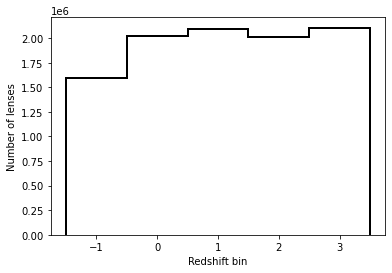

In [3]:
# Plot a histogram of the lens redshift distribution with 4 bins centered at -1, 0, 1, 2, 3
plt.hist(zbinning, bins=[-1.5,-0.5,0.5,1.5,2.5,3.5], histtype='step', color='k', linewidth=2)
# Print as text the total number of galaxies with zbinning different from -1
print('Total number of galaxies with zbinning different from -1: ', np.sum(zbinning!=-1))
plt.xlabel('Redshift bin')
plt.ylabel('Number of lenses')
plt.show()
plt.close()

In [4]:
# Read the whole catalog to obtain the object-id of each lens
fname_cat = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/2023_reanalysis/photometry_lenscatalog_hsc_ALL_nonmetacal_pdr1_11_06.h5'
cat = h5py.File(fname_cat, 'r') 

In [5]:
# Show the first 5 rows of the catalog
print("First 5 rows of the catalog:")
print(astropy.table.Table(cat['photometry'])[:5])

First 5 rows of the catalog:
        dec          extendedness ...       snr_z        wl_fulldepth_fullcolor
-------------------- ------------ ... ------------------ ----------------------
 -0.2763478302096189          1.0 ...  16.38642230692214                    1.0
-0.27576247379703056          1.0 ... 18.254273965324348                    1.0
-0.27566030759691984          1.0 ... 16.235851994227467                    1.0
-0.27351925292998497          1.0 ...  35.96301013158643                    1.0
-0.27330462281165474          1.0 ... 25.786953408096014                    1.0


In [6]:
# Show the names of the columns of the catalog
print("Columns of the catalog:")
print(cat['photometry'].keys())

Columns of the catalog:
<KeysViewHDF5 ['dec', 'extendedness', 'mag_g', 'mag_g_err', 'mag_i', 'mag_i_err', 'mag_r', 'mag_r_err', 'mag_u', 'mag_u_err', 'mag_y', 'mag_y_err', 'mag_z', 'mag_z_err', 'mean_z', 'objectId', 'ra', 'redshift_true', 'sigma_e', 'snr_g', 'snr_i', 'snr_r', 'snr_u', 'snr_y', 'snr_z', 'wl_fulldepth_fullcolor']>


In [8]:
# Extractç Object ids of each lens to cross-match with other catalogs
ObjectId = np.array(cat['photometry']['objectId'])
RA = np.array(cat['photometry']['ra'])
DEC = np.array(cat['photometry']['dec'])

Total number of objects:  9832131


Total number of unique objects:  5108715


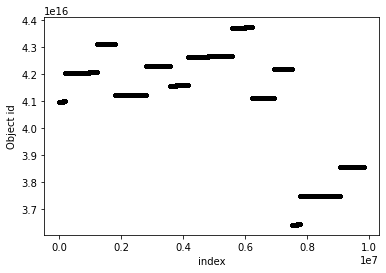

In [9]:
################################################################
### Matching with the tomography catalog using the object id ###
################################################################

# Check how many ObjectId are there and if they are unique
print("Total number of objects: ", len(ObjectId))
print("Total number of unique objects: ", len(np.unique(ObjectId)))

plt.plot(np.arange(len(ObjectId)), ObjectId, 'k.')
plt.xlabel('index')
plt.ylabel('Object id')
plt.show()
plt.close()

In [10]:
#################################################################
### Matching with the tomography catalog using the ra and dec ###
#################################################################

# Check how many ra and dec are there and if they are unique
print("Total number of ra: ", len(RA))
print("Total number of unique ra: ", len(np.unique(RA)))
print("Total number of dec: ", len(DEC))
print("Total number of unique dec: ", len(np.unique(DEC)))

Total number of ra:  9832131


Total number of unique ra:  9832131
Total number of dec:  9832131
Total number of unique dec:  9832131


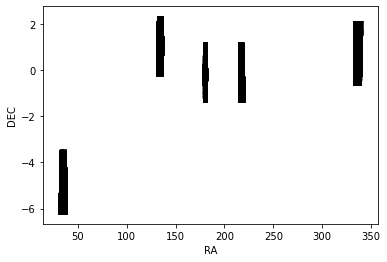

In [11]:
plt.scatter(RA, DEC, color='k', s=0.00001)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()
plt.close()

In [12]:
# Generate an astropy table with the object-id and the z-bin of each lens
lens_zbin = astropy.table.Table([ObjectId, RA, DEC, zbinning], names=('object_id', 'ra', 'dec', 'zbin'))

In [13]:
# Show first 5 rows
lens_zbin[:5]

object_id,ra,dec,zbin
float64,float64,float64,int32
4.096343526919391e+16,131.08128065670326,-0.2763478302096189,3
4.0963435269193944e+16,131.0769311215249,-0.27576247379703056,3
4.0963435269193944e+16,131.10765478378423,-0.27566030759691984,1
4.096343526919402e+16,131.0679847903752,-0.27351925292998497,2
4.0963435269194024e+16,131.03186587934692,-0.27330462281165474,2


In [14]:
print('Number of lenses in each zbin: ', np.bincount(zbinning+1)[1:])
print('Total number of lenses: ', len(zbinning))
print('Total number of galaxies with zbinning different from -1: ', np.sum(zbinning!=-1))

Number of lenses in each zbin:  [2024826 2090874 2014036 2105885]
Total number of lenses:  9832131
Total number of galaxies with zbinning different from -1:  8235621


In [15]:
# Read the table from which we will extract the redshift distribution of each z-bin
path_zestimates = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'

fname_zestimate = os.path.join(path_zestimates, 'gama09h_pdr1.fits')
# Read the table
tab = astropy.table.Table.read(fname_zestimate)
# Print the name of the columns
print(tab.colnames)

['object_id', 'object_id_isnull', 'ra', 'ra_isnull', 'dec', 'dec_isnull', 'tract', 'tract_isnull', 'patch', 'patch_isnull', 'merge_peak_g', 'merge_peak_g_isnull', 'merge_peak_r', 'merge_peak_r_isnull', 'merge_peak_i', 'merge_peak_i_isnull', 'merge_peak_z', 'merge_peak_z_isnull', 'merge_peak_y', 'merge_peak_y_isnull', 'gcountinputs', 'gcountinputs_isnull', 'rcountinputs', 'rcountinputs_isnull', 'icountinputs', 'icountinputs_isnull', 'zcountinputs', 'zcountinputs_isnull', 'ycountinputs', 'ycountinputs_isnull', 'iflags_pixel_bright_object_center', 'iflags_pixel_bright_object_center_isnull', 'iflags_pixel_bright_object_any', 'iflags_pixel_bright_object_any_isnull', 'iclassification_extendedness', 'iclassification_extendedness_isnull', 'iblendedness_abs_flux', 'iblendedness_abs_flux_isnull', 'a_g', 'a_g_isnull', 'a_r', 'a_r_isnull', 'a_i', 'a_i_isnull', 'a_z', 'a_z_isnull', 'a_y', 'a_y_isnull', 'gflux_psf', 'gflux_psf_isnull', 'rflux_psf', 'rflux_psf_isnull', 'iflux_psf', 'iflux_psf_isnull'

In [16]:
# Read the table from which we will extract the redshift distribution of each z-bin
path_zestimates = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'

fields = ['gama09h','gama15h','wide12h','xmm','vvds']

# Print a list with all the files in path_zestimates and the date of last modification
# print('Files in path_zestimates: ')
# os.system('ls -lhtr '+path_zestimates)

# Loop over the fields
for fi in fields:
    print(fi)
    fname_zestimate = os.path.join(path_zestimates, fi+'_pdr1.fits')
    # Read the table
    tab = astropy.table.Table.read(fname_zestimate)
    # Print the name of the columns
    # print(tab.colnames)
    # Just keep the columns we need: 'object_id', 'pz_mc_eab', 'pz_mc_frz', 'pz_mc_nnc'
    tab = tab['object_id', 'ra', 'dec', 'pz_mc_eab', 'pz_mc_frz', 'pz_mc_nnz']
    # Check which percentage of lens_zbin['object_id'] is in tab['object_id']
    print('Percentage of lenses in '+fi+' with pz_mc_eab: ', np.sum(np.isin(lens_zbin['object_id'], tab['object_id']))/len(lens_zbin))
    # If it is the first field, create the table
    if fi == fields[0]:
        zestimate = tab
    # If not, append the table
    else:
        zestimate = astropy.table.vstack([zestimate, tab])

gama09h


Percentage of lenses in gama09h with pz_mc_eab:  0.18165766912584871
gama15h
Percentage of lenses in gama15h with pz_mc_eab:  0.18257110284637176
wide12h
Percentage of lenses in wide12h with pz_mc_eab:  0.13233957114688566
xmm
Percentage of lenses in xmm with pz_mc_eab:  0.2356921403915387
vvds
Percentage of lenses in vvds with pz_mc_eab:  0.2677395164893552


In [17]:
zestimate[:3]

object_id,ra,dec,pz_mc_eab,pz_mc_frz,pz_mc_nnz
int64,float64,float64,float32,float32,float32
40963435269193901,131.07344981235062,-0.276930276177698,2.6156933,3.7424004,3.526711
40963435269193903,131.10265285844636,-0.27674307728476094,3.4364078,3.5347776,0.89275205
40963435269193910,131.0318302650449,-0.2766478446049002,0.46213967,4.4225574,3.6840177


In [18]:
# Check how many ra and dec are there and if they are unique
print("Total number of ra: ", len(zestimate['ra']))
print("Total number of unique ra: ", len(np.unique(zestimate['ra'])))
print("Total number of dec: ", len(zestimate['dec']))
print("Total number of unique dec: ", len(np.unique(zestimate['dec'])))

Total number of ra:  39279395


Total number of unique ra:  39279394
Total number of dec:  39279395
Total number of unique dec:  39279388


In [19]:
# Check how many (ra, dec) are unique
print("Total number of unique (ra, dec): ", len(np.unique(np.array([zestimate['ra'], zestimate['dec']]).T, axis=0)))

Total number of unique (ra, dec):  39279395


In [20]:
# Print the number of objects_id in lens_zbin that are not in zestimate
print('Number of objects_id in lens_zbin that are not in zestimate: ', np.sum(~np.isin(lens_zbin['object_id'], zestimate['object_id'])))

Number of objects_id in lens_zbin that are not in zestimate:  0


In [21]:
print('Number of objects in the zestimate table (BEFORE JOIN): ', len(zestimate))

Number of objects in the zestimate table (BEFORE JOIN):  39279395


In [22]:
# Merge the tables by "object_id"
# zestimate = astropy.table.join(lens_zbin, zestimate, keys='object_id')

# Merge the tables by "ra" and "dec"
table = astropy.table.join(lens_zbin, zestimate, keys=['ra', 'dec'])

In [23]:
print('Number of objects in the zestimate table (AFTER JOIN): ', len(table))

Number of objects in the zestimate table (AFTER JOIN):  9832131


In [24]:
print('Unique values in zbin column: ', np.unique(table['zbin']))

Unique values in zbin column:  zbin
----
  -1
   0
   1
   2
   3


In [25]:
# Define matplolib colors: black, purple, green, red
colors = ['#000000', '#800080', '#008000', '#ff0000']

# Matplotlib style
plt.rcParams['figure.figsize'] = 8., 6.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.pad'] = 6.
plt.rcParams['xtick.minor.pad'] = 6.
plt.rcParams['ytick.major.pad'] = 6.
plt.rcParams['ytick.minor.pad'] = 6.
plt.rcParams['xtick.major.size'] = 4. # major tick size in points
plt.rcParams['xtick.minor.size'] = 3. # minor tick size in points
plt.rcParams['ytick.major.size'] = 4. # major tick size in points
plt.rcParams['ytick.minor.size'] = 3. # minor tick size in points
# Thickness of the axes lines
plt.rcParams['axes.linewidth'] = 1.5
# Smaller font size for axes ticks labels
plt.rcParams['xtick.labelsize'] = 13
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] =  'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman Bold'
plt.rcParams['font.size'] = 18  

>> PZ_MC_EAB
zbin =  0
[-0.00744124  0.02763063  0.0627025   0.09777436  0.13284624  0.1679181
  0.20298997  0.23806185  0.2731337   0.30820557  0.34327745  0.3783493
  0.41342118  0.44849306  0.4835649   0.5186368   0.5537087   0.5887805
  0.6238524   0.6589243   0.69399613  0.72906804  0.7641399   0.79921174
  0.8342836   0.86935544  0.90442735  0.9394992   0.9745711   1.009643
  1.0447148   1.0797867   1.1148586   1.1499305   1.1850023   1.2200742
  1.255146    1.2902179   1.3252897   1.3603616   1.3954335   1.4305054
  1.4655772   1.5006491   1.535721    1.5707929   1.6058648   1.6409366
  1.6760085   1.7110803   1.7461522   1.781224    1.816296    1.8513678
  1.8864397   1.9215115   1.9565834   1.9916553   2.0267272   2.061799
  2.096871    2.1319427   2.1670146   2.2020864   2.2371583   2.2722301
  2.307302    2.3423738   2.377446    2.4125178   2.4475896   2.4826615
  2.5177333   2.5528052   2.587877    2.622949    2.6580207   2.6930926
  2.7281644   2.7632363   2.7983084   2.83

FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/lens_pdr1_redshift_distr/pz_mc_eab_lens_pdr1_redshift_distr.txt'

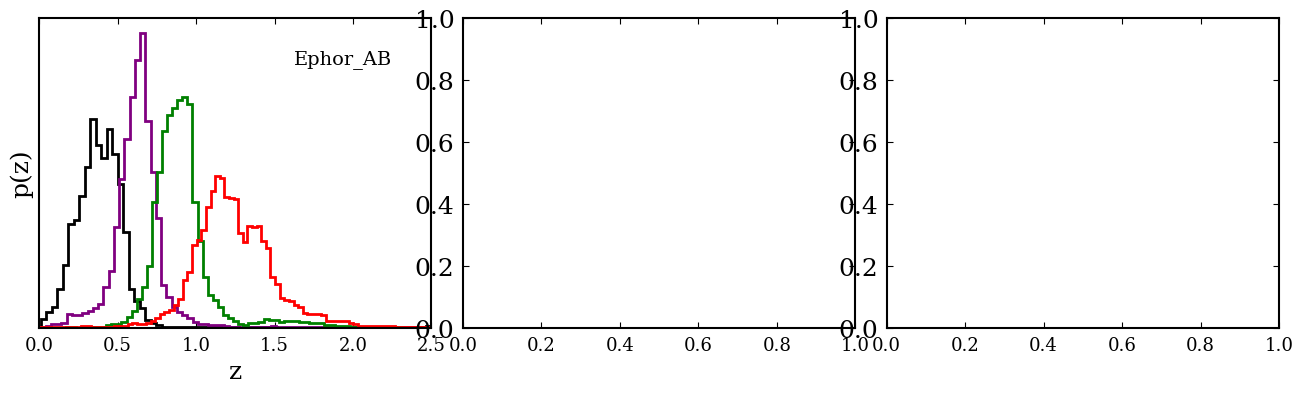

In [26]:
# Path where to save the txt files with the redshift distributions
path_save = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/lens_pdr1_redshift_distr'

# Initialize a matplotlib figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
# Remove the space between subfigures
fig.subplots_adjust(wspace=0.08)

# Methods dictionary
methods = {'pz_mc_eab': 'Ephor_AB', 'pz_mc_frz': 'FRANKEN-Z', 'pz_mc_nnz': 'NNZ'}

# Iterate over the methods
for ind, method in enumerate(methods.keys()):
    print('>>',method.upper())
    # For each method, create a txt file with the redshift distribution of each z-bin
    # Initialize the txt file
    fname = os.path.join(path_save, method+'_lens_pdr1_redshift_distr.txt')
    # Iterate over the z-bins with zbinning!=-1
    for zbin in np.unique(table['zbin'][table['zbin']!=-1]):    
        print('zbin = ', zbin)
        # Select the objects in the z-bin exlucluding the objects with zbinning=-1
        mask = (table['zbin']==zbin) & (table['zbin']!=-1)
        # Plot the histogram and output the values to the txt file
        nz, z, _ = axes[ind].hist(table[method][mask], 
                                bins=200, 
                                density=True,
                                histtype='step', 
                                color=colors[zbin], 
                                linewidth=2)
        # Compute the center of the z bins
        z = 0.5*(z[1:]+z[:-1])
        print(z)
        # Set to 0 any negative value in nz
        nz[nz<0] = 0    
        if zbin == 0:
            file = np.vstack([z,nz])
        else:
            file = np.vstack([file, nz])
        # print(file.T)
        # print(file.T.shape)

    # Add the legend
    axes[ind].set_xlabel('z')
    # Text with the name of the method in the upper right corner of the subfigure
    axes[ind].text(0.9, 0.9, methods[method], 
                    horizontalalignment='right', 
                    verticalalignment='top', 
                    transform=axes[ind].transAxes,
                    fontsize=14)
    axes[0].set_ylabel('p(z)')
    # Set the x and y limits
    axes[ind].set_xlim(0, 2.5)
    # Hide the y ticks
    axes[ind].set_yticks([])
    # Save the txt file
    np.savetxt(fname, file.T, delimiter=' ', fmt='%.6e')

# Save the figure in pdf and png formats with dpi=300 in the path_save directory
fname = os.path.join(path_save, 'lens_pdr1_redshift_distr.pdf')
fig.savefig(fname, dpi=300, bbox_inches='tight')
fname = os.path.join(path_save, 'lens_pdr1_redshift_distr.png')
fig.savefig(fname, dpi=300, bbox_inches='tight')

plt.show()
plt.close() 

In [28]:
# Show head of the txt file with the redshift distribution of each z-bin
print('Head of the txt file with the redshift distribution of each z-bin:')
os.system('head -n 5 '+os.path.join(path_save, '*_lens_pdr1_redshift_distr.txt'))

Head of the txt file with the redshift distribution of each z-bin:
==> /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/lens_pdr1_redshift_distr/pz_mc_eab_lens_pdr1_redshift_distr.txt <==
-7.441241e-03 2.109430e-02 8.329607e-03 4.299739e-03 2.634371e-03
2.763063e-02 1.255519e-01 1.811904e-02 4.330451e-03 8.905142e-03
6.270250e-02 2.146465e-01 2.749343e-02 4.883275e-03 1.950727e-02
9.777436e-02 2.862235e-01 5.965257e-02 6.557102e-03 1.482036e-02
1.328462e-01 5.242034e-01 6.184233e-02 5.758579e-03 1.202436e-02

==> /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/lens_pdr1_redshift_distr/pz_mc_frz_lens_pdr1_redshift_distr.txt <==
1.493530e-02 3.944764e-01 3.528801e-01 2.788492e-01 3.012806e-01
4.482590e-02 1.563531e-01 2.766935e-02 9.106973e-03 1.635433e-02
7.471651e-02 2.648072e-01 3.749421e-02 9.737329e-03 1.625934e-02
1.046071e-01 4.080084e-01 4.899648e-02 1.089851e-02 1.456532e-02
1.344977e-01 5.642955e-01 5.854976e-02 9.720742e-03 1.317212e-02

==> /pscratch/

0

ft_distr/pz_mc_nnz_lens_pdr1_redshift_distr.txt <==
1.401124e-02 7.394942e-02 2.560788e-02 4.968107e-03 7.820790e-03
4.202798e-02 1.730423e-01 2.579530e-02 6.091636e-03 1.424861e-02
7.004470e-02 1.678585e-01 4.521844e-02 8.444026e-03 1.559123e-02
9.806143e-02 3.207473e-01 8.288912e-02 1.465855e-02 1.797439e-02
1.260782e-01 4.750642e-01 9.767798e-02 1.669494e-02 2.077712e-02


/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


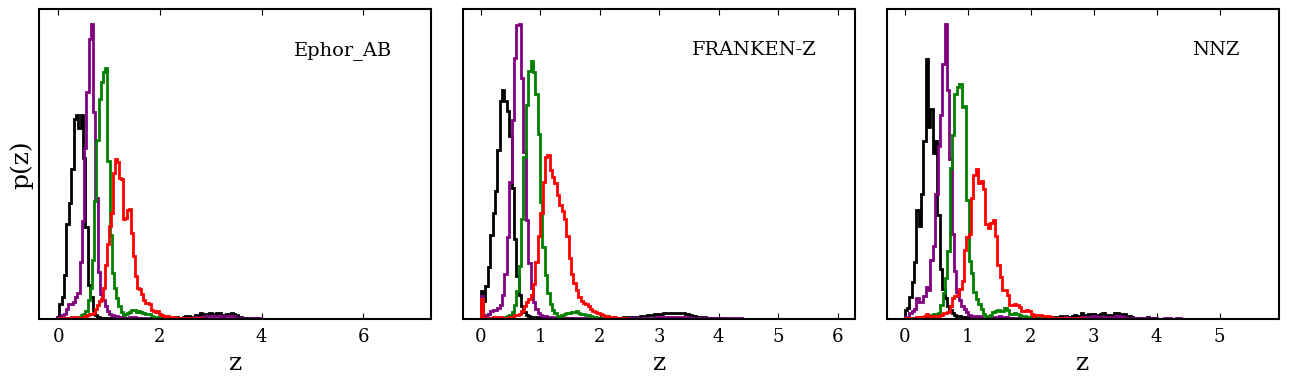

In [29]:
# Initialize a matplotlib figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
# Remove the space between subfigures
fig.subplots_adjust(wspace=0.08)

# Iterate over the methods
for ind, method in enumerate(methods.keys()):
    # Iterate over the z-bins
    for zbin in np.unique(table['zbin']):
        # Select the objects in the z-bin exlucluding the objects with zbinning=-1
        mask = (table['zbin']==zbin) & (table['zbin']!=-1)
        # Plot the histogram
        axes[ind].hist(table[method][mask], 
                        bins=150, 
                        density=True,
                        histtype='step', 
                        color=colors[zbin], 
                        linewidth=2)
    # Add the legend
    axes[ind].set_xlabel('z')
    # Text with the name of the method in the upper right corner of the subfigure
    axes[ind].text(0.9, 0.9, methods[method], 
                    horizontalalignment='right', 
                    verticalalignment='top', 
                    transform=axes[ind].transAxes,
                    fontsize=14)
    axes[0].set_ylabel('p(z)')
    # Set the x and y limits
    # axes[ind].set_xlim(0, 2.5)
    # Hide the y ticks
    axes[ind].set_yticks([])
plt.show()
plt.close()

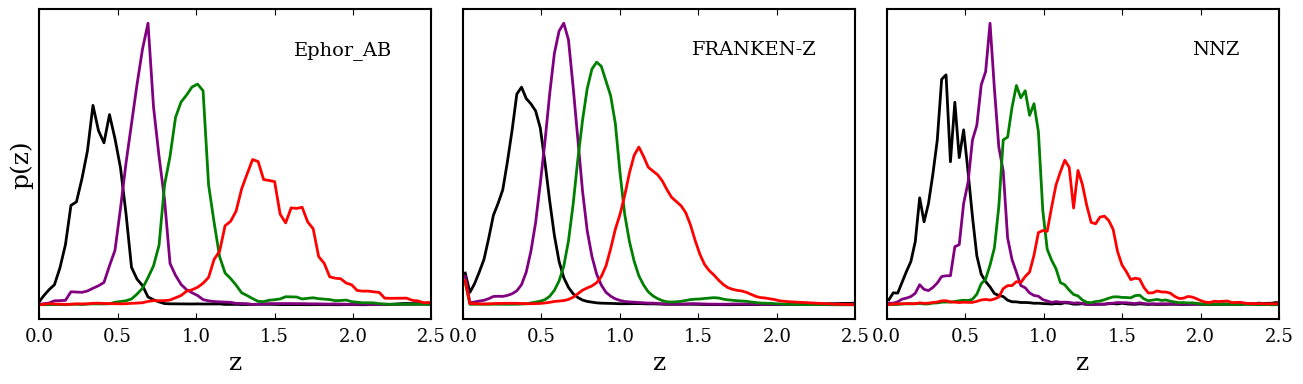

In [36]:
# For the text files in path_save, read each file and plot the redshift distribution of each z-bin considering that
# the first column is the redshift domain and the following columns are the redshift distributions of each z-bin
# Initialize a matplotlib figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
# Remove the space between subfigures
fig.subplots_adjust(wspace=0.08)
# Read the txt files in path_save
for ind, method in enumerate(methods.keys()):
    fname = os.path.join(path_save, method+'_lens_pdr1_redshift_distr.txt')
    # Read the txt file
    nz = np.loadtxt(fname, unpack=False)
    z = nz[:,0]
    # Iterate over the z-bins
    for zbin in np.arange(4):
        # Plot the histogram
        axes[ind].plot(z, nz[:,zbin+1], color=colors[zbin], linewidth=2)
    # Add the legend
    axes[ind].set_xlabel('z')
    # Text with the name of the method in the upper right corner of the subfigure
    axes[ind].text(0.9, 0.9, methods[method], 
                    horizontalalignment='right', 
                    verticalalignment='top', 
                    transform=axes[ind].transAxes,
                    fontsize=14)
    axes[0].set_ylabel('p(z)')
    # Set the x and y limits
    axes[ind].set_xlim(0, 2.5)
    # Hide the y ticks
    axes[ind].set_yticks([])

### Comparing with other methods

In [25]:
import sacc
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data'
# Case 1 (fid.) - photo-z mc Ephor AB stack
fname = os.path.join(path,'harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz/summary_statistics_fourier_all_SourcesS16A_LensesDR1_pz_mc_eab.sacc')
sacc_ephor = sacc.Sacc.load_fits(fname)
# Case 2 - true-z stacking from TXPipe
fname = os.path.join(path,'harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz/summary_statistics_fourier.sacc')
sacc_true = sacc.Sacc.load_fits(fname)
# Case 3 - photo-z DIR estimation (Andrina)
path = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/nicola/cosmicshear'
fname = os.path.join(path,'cls_signal_covG_HSC.fits')
sacc_dir = sacc.Sacc.load_fits(fname)

In [11]:
# sacc_ephor.tracers.items()
# sacc_true.tracers.items()
# sacc_dir.tracers.items()

dict_items([('wl_0', <sacc.tracers.NZTracer object at 0x7f159c776aa0>), ('wl_1', <sacc.tracers.NZTracer object at 0x7f159c775ba0>), ('wl_2', <sacc.tracers.NZTracer object at 0x7f159c775b10>), ('wl_3', <sacc.tracers.NZTracer object at 0x7f159c776a10>)])

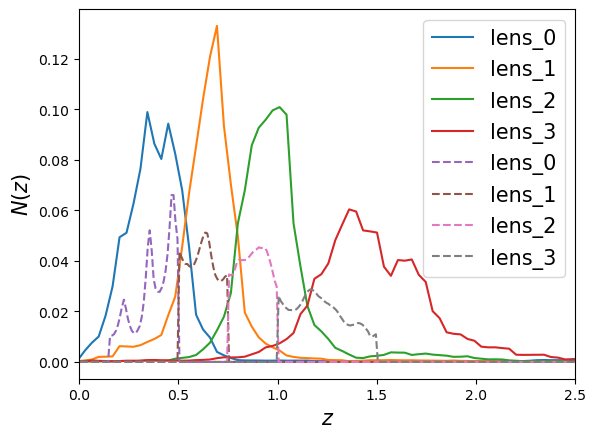

In [27]:
plt.figure()
linestyles = ['-', '--', '-.', ':']
k = 0
for s in [sacc_ephor, sacc_true]:
    print(s)
    ls = linestyles[k]
    for i_t, (n, t) in enumerate(s.tracers.items()):
        if 'lens' in n:
            z = t.z
            nz = t.nz
            # Normalize nz distribution
            nz = nz/np.sum(nz)
            plt.plot(z, nz, label=n, linestyle=ls)
    k+=1
plt.xlim([0, 2.5])
plt.xlabel(r'$z$', fontsize=15)
plt.ylabel(r'$N(z)$', fontsize=15)
plt.legend(fontsize=15)
plt.show()